# Temperature Evolution and Forecasting with Time Series Analysis                    


This tutorial will teach you how to apply time series models (ARIMA) to forecast and predict the future out of past values. Here, we are given a time serie of previous values of temperature in different cities of the world and we would like to infer the future (forecasting).

To demonstrate this, we will use the available data of the temperature evolution in a city of your choice. The data is given in Fahrenheit.

First we'll donwload all the necessary packages for the lab: numpy, sklearn, statsmodels, pandas, datetime

Disclaimer : Although the usage of ChatGPT is not encouraged, it is not forbidden. In case you want to use it, please use it in an intelligent manner, seek explanations and learn something out of it. Do not just copy and paste the answers.

In [57]:
# Install required packages.
!python3 -m pip install --upgrade pip
!pip3 install datetime
!pip3 install --upgrade patsy
!pip3 install --upgrade --no-deps statsmodels
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip install plotly

'python3' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [58]:
# importing the necessary packages for the lab
import pandas as pd
import warnings
from pandas import DataFrame, read_csv, to_datetime
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
%matplotlib notebook

## Data analysis

1 - read the csv file.

In [59]:
from pandas import DataFrame, read_csv, to_datetime

# your code here
df = pd.read_csv('city_temperature.csv')

print(df)


                Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  

2 - Explore and describe the structure of the data. How is the data organized, what do the values correspond to? Find the mean, count, average, std, of the average temperature. Hint : use dataframes.head(), .info() , describe()

In [4]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [5]:
# your code here
df.head()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
# your code here
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


3 - Find the number of unique values in each column of the data frame

In [7]:
# your code here
#df['Month'].unique()
#df['Day'].unique()
#df['Year'].unique()
df_unique=df['AvgTemperature'].unique()
df_unique = pd.DataFrame(df_unique)

print(df_unique)

##On trouve 1516 températures différentes enregistrées.

         0
0     64.2
1     49.4
2     48.8
3     46.4
4     47.9
...    ...
1512 -43.7
1513 -43.5
1514 -38.5
1515 -37.1
1516 -36.7

[1517 rows x 1 columns]


4 - Check if we have duplicates in the lines of the dataframe. Drop the found duplicates.

In [8]:
# your code here

print(df[df.duplicated()])
df_sans_dup=df.drop_duplicates()
print(df_sans_dup)


                Region  Country     State           City  Month  Day  Year  \
742977          Europe  Germany       NaN        Hamburg     12    9  2007   
742983          Europe  Germany       NaN        Hamburg     12   15  2007   
742984          Europe  Germany       NaN        Hamburg     12   16  2007   
742990          Europe  Germany       NaN        Hamburg     12   22  2007   
742991          Europe  Germany       NaN        Hamburg     12   23  2007   
...                ...      ...       ...            ...    ...  ...   ...   
1705580  North America       US  Maryland  Washington DC      5    9  2020   
1705581  North America       US  Maryland  Washington DC      5   10  2020   
1705582  North America       US  Maryland  Washington DC      5   11  2020   
1705583  North America       US  Maryland  Washington DC      5   12  2020   
1705584  North America       US  Maryland  Washington DC      5   13  2020   

         AvgTemperature  
742977            -99.0  
742983     

5 - Find the number of average temperature measured for each year. Hint : use df.groupby and count()
What is wrong with the results you get? Propose a clever solution to solve the problem.

In [9]:
# your code here
df1=df_sans_dup.groupby('Year')
df2=df1['AvgTemperature'].count()
print(df2)

#On remarque qu'il y a des années 200 et 201. De même, pour l'année 2020 on a moins de données que pour les autres années.
#Pour régler ce problème, on va supprimer ces trois années.

Year
200         60
201        235
1995    117886
1996    118218
1997    117926
1998    118352
1999    118625
2000    118950
2001    118625
2002    118625
2003    118410
2004    117913
2005    117165
2006    116917
2007    114685
2008    113831
2009    113517
2010    114533
2011    112313
2012    111261
2013    110291
2014    108288
2015    106768
2016    106505
2017    106216
2018    105660
2019    105295
2020     38542
Name: AvgTemperature, dtype: int64


In [10]:
# your code here
df3=df[df["Year"] >201 ]
df3 = df3[df3["Year"]<2020]



In [11]:
# Found 32 days instead of 31. So we remove day 0.
df3 = df3[df3['Day']>0]
print('1st Day: \n{}'.format(df3['Day'].agg([min])))

1st Day: 
min    1
Name: Day, dtype: int64


6 - Plot the histogram of average temperature across the world. Is there something wrong?

<IPython.core.display.Javascript object>


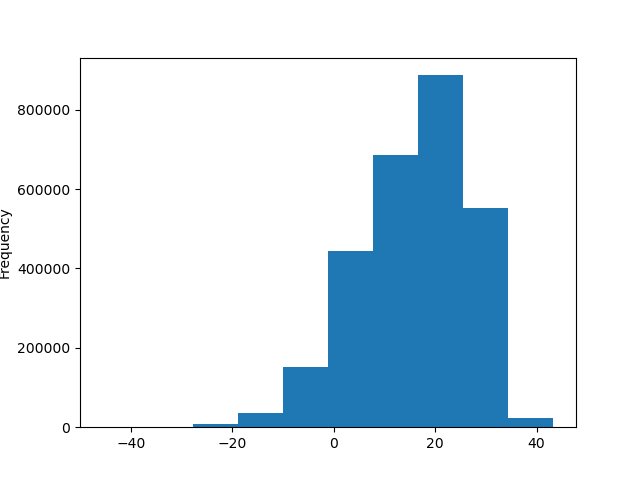

In [19]:
# your code here
df_temp1=df3['AvgTemperature']
histogram = df_temp1.plot.hist()

#Oui, on remarque une anomalie : il y a une température trop basse de -99 Farenheit. Il va falloir l'enlever.

7- (-99) is just a place holder for missing temperatures, we are therefore asked to remove these values.

<IPython.core.display.Javascript object>


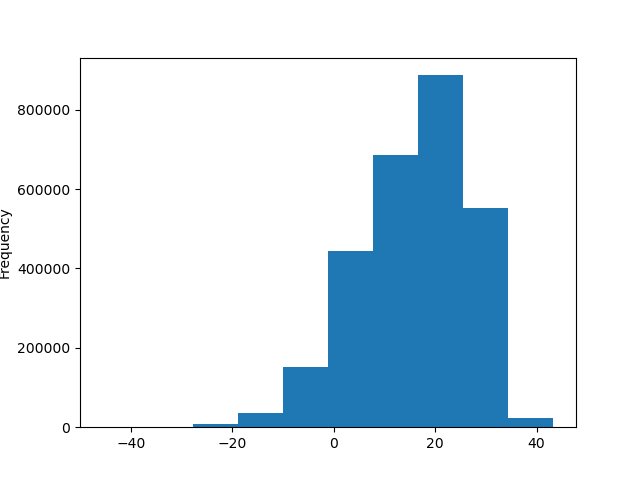

In [20]:
# your code here

df3 = df3[df3['AvgTemperature']>-99]

df_temp2=df3['AvgTemperature']
histogram2 = df_temp2.plot.hist()

8 - Find coldest and hottest temperature in the world. Hint : use dataframe.agg()

In [21]:
# your code here

df_temp2.agg(['min', 'max'])

min   -45.555556
max    43.333333
Name: AvgTemperature, dtype: float64

9 - Convert the average temperature to Celcius.

In [22]:
# your code here
df3['AvgTemperature']=(df3['AvgTemperature']-32)*(5/9)
df_temp3=df3['AvgTemperature']
#print(df_temp)
df_temp3.agg(['min', 'max'])

min   -43.086420
max     6.296296
Name: AvgTemperature, dtype: float64

In [23]:
# here we will show the average temperature in the different countries in the world during the last 25 years.
temp_data = df3[['Country', 'Year', 'AvgTemperature']].groupby(['Country','Year']).mean().reset_index()

px.choropleth(data_frame=temp_data, locations="Country", locationmode='country names', animation_frame="Year",
              color='AvgTemperature', color_continuous_scale=["blue", "green", "red"],     #'Bluered',
              title="Average Temperature of each country from 1995 to 2019")

<IPython.core.display.Javascript object>


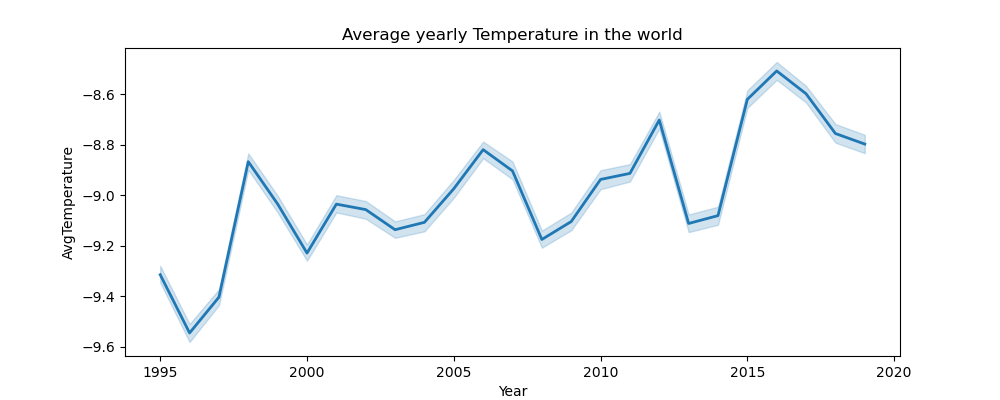

In [24]:
# show average yearly temperature in the world.
plt.figure(figsize=(10,4))
plt.title("Average yearly Temperature in the world")
sns.lineplot(data=df3, x='Year', y='AvgTemperature', lw=2)
plt.show()

10 - Compute the average temperature per year across the world.

Perform a linear regression in order to estimate the increase in temperature per year. Plot the results on the same figure as before.


In [39]:
# your code here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df3_year=df3.groupby('Year')

X=df3_year['Year']
Y=df3_year['AvgTemperature'].mean()

model=LinearRegression()
#model.fit(X, Y)


## Time series modeling and forecasting

11 - Pick a country of your choice, and extract the temperature evolution during time.  

In [69]:
df_country = df3.head(9267) # your code here


12 - Plot the yearly evolution of the average temperature in the chosen country. Hint : use sns.lineplot

<IPython.core.display.Javascript object>


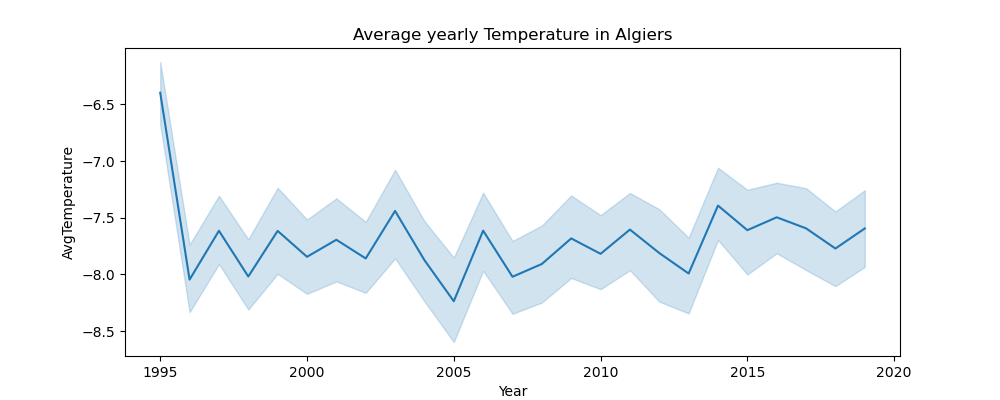

In [61]:
# your code here

plt.figure(figsize=(10,4))
plt.title("Average yearly Temperature in Algiers")
sns.lineplot(data=df_country, x='Year', y='AvgTemperature')
plt.show()

13 - Plot the monthly evolution of the average temperature in the chosen country.

<IPython.core.display.Javascript object>


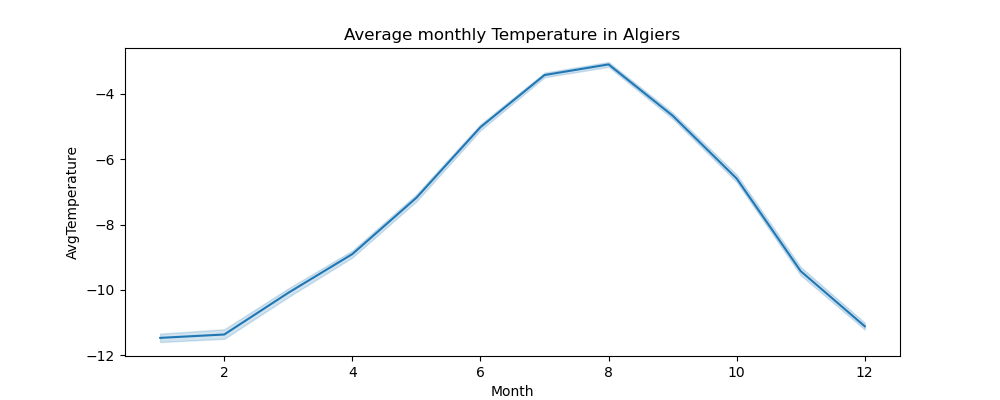

In [62]:
# your code here
# your code here

plt.figure(figsize=(10,4))
plt.title("Average monthly Temperature in Algiers")
sns.lineplot(data=df_country, x='Month', y='AvgTemperature')
plt.show()

In [71]:
# Converting Day, month and years to a date and add it to the dataframe
df_country['date'] = pd.to_datetime(df_country[['Day','Month','Year']], dayfirst=True)

14 - Extract the temperature evolution time series (extract only the date and AvgTemperature columns) for the chosen country.

In [72]:
# your code here
df_country_date = df_country['date']
df_country_AvgTemperature=df_country['AvgTemperature']

In [73]:
# setting the index
df_country = df_country.set_index('date')
df_country.index = pd.DatetimeIndex(df_country.index).to_period(freq='D')

In [ ]:
# your code here

15 - Plot the time series. Is the data stationary? Why? Does it have a trend? a fixed variance? seasonality? What do you suggest to make it stationary?

<IPython.core.display.Javascript object>


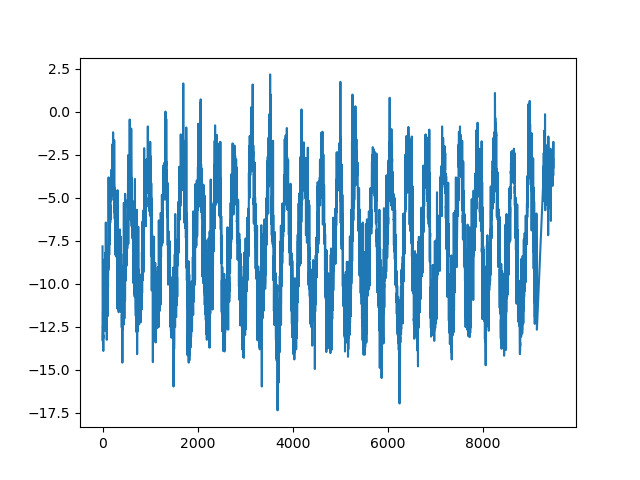

In [74]:
# your code here
plt.plot(df_country_AvgTemperature)

In [ ]:
#REPONDRE AUX QUESTIONS

16 - In order to reduce variability within the data, we are now interested in computing the 7-days rolling average. Create a 1-dimensional discrete time digital filter to do so, apply it to your data, and plot the output of the filter.
Hint : find the right pad size, use np.pad with 'reflect' argument [https://numpy.org/doc/stable/reference/generated/numpy.pad.html], np.convolve with mode='valid' [https://numpy.org/doc/stable/reference/generated/numpy.convolve.html]

- Write the output of your filter y[n] as a function of the input x[n], 3 previous values x[n-1], x[n-2], x[n-3], and 3 future values x[n+1], x[n+2], x[n+3].
- What is the type of your filter? is it a low pass? a high pass? What is the order of your filter. Explain.
- Is it a finite-impulse reponse (FIR) filter or an infinite impulse reponse (IIR) filter? Explain.


In [ ]:
# your code here
# Define the filter coefficients for a simple moving average
filter_size = 7
filter_coefficients = np.ones(filter_size) / filter_size

In [ ]:
pad_size = (filter_size - 1) // 2
x_padded = np.pad(x, (pad_size, pad_size), mode='reflect')

In [ ]:
# Apply the filter using np.convolve with mode='valid'
y = np.convolve(x_padded, filter_coefficients, mode='valid')

17 - Is this time series stationary? Create a first order difference filter (y[n] = x[n] - x[n-1]) to compute first differences and apply it to the 7 days rolling mean. Check the ACF and PACF

Create a 1-dimensional filter in order to compute the first differences of the data and plot the output of the filter. What is this filter used for? 

Hint: Use np.convolve (https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) with "mode=same"

18- Create a 1-dimensional filter in order to remove the seasonality of the data and plot the output of the filter.

Hint: Use np.convolve (https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) with "mode=same"

## Auto-correlation functions (ACF and PACF)

18 - In the following, we will use the librairy https://www.statsmodels.org/dev/tsa.html.

Plot the Auto-correlation function (ACF) and the partial autocorrelation function (PACF) of the first 40 lags of the two time series obtained (after filtering). Use plot_acf and plot_pacf https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# your code here

19 - What can we observe? Can we guess an order of an ARIMA model out of those plots?

### ARIMA modeling

In [ ]:
import statsmodels.tsa.arima.model as MODEL
from sklearn.metrics import r2_score,mean_squared_error

20 - Fit an ARIMA model of order (2,0,0) to the data. Print the summary of your result (print(res.summary()). Try to explain what you see.

In [ ]:
# your code here

21 - show the predicted time series and the original one on the same plot. Compare?


In [ ]:
# your code here

22 - Use res.forecast to forecast 10 future values.

In [ ]:
# your code here

23 - compute the mean squared error between the predicted times series and the ground truth.

In [ ]:
# your code here

## Seasonality and trend analysis

24- We can observe that there is a strong seasonal component in our data.
Is our data following an additive or a multiplicative model?

Hint : In a multiplicative model the seasonal variation increases over time.
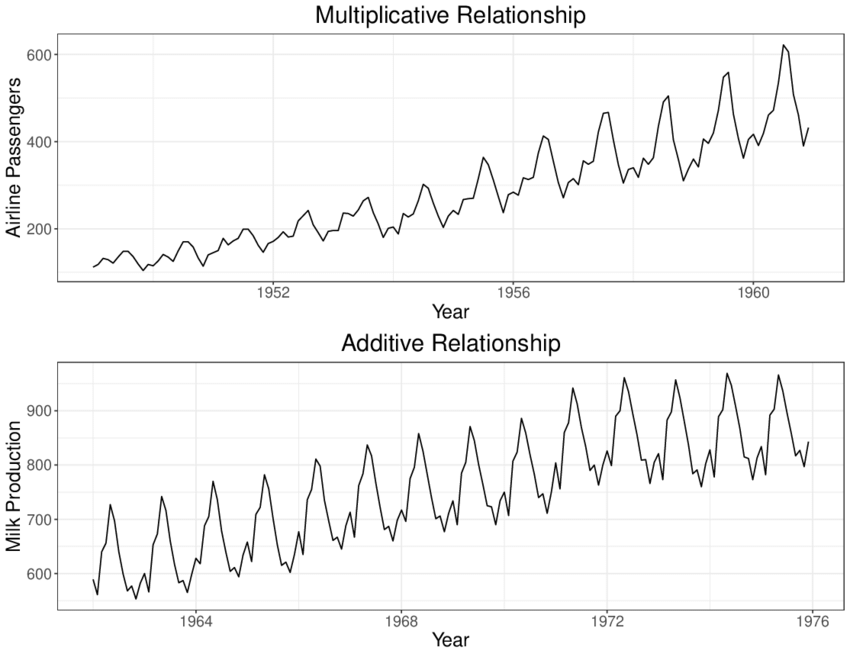

Also, since we are dealing with daily data that extends for several years, we can argue that the seasonal component repeats every 365 days, so we will set the period to 365.

In [ ]:
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

25 - use seasonal_decompose to extract the trend, seasonality and residual components from the data. Hint: set the right period, and extrapolate_trend to 'freq'

In [ ]:
decomposition = # your code here

In [ ]:
fig, axs = plt.subplots(4, figsize=(12, 6))
fig.suptitle('Time series decomposition')
decomposition.observed.plot(ax=axs[0])
decomposition.trend.plot(ax=axs[1])
decomposition.seasonal.plot(ax=axs[2])
decomposition.resid.plot(ax=axs[3])
axs[0].set_ylabel('Observed')
axs[1].set_ylabel('Trend')
axs[2].set_ylabel('Seasonal')
axs[3].set_ylabel('Residual')
plt.subplots_adjust(hspace=1)

26 - Explain the output of the different plots. What does this give us as information ?

We should verify that the residuals are white noise (whose requirements coincide with those of stationarity).
We can use the Augmented Dickey-Fuller Test (Do some research !) to check stationarity.

In [ ]:
adf_test = adfuller(decomposition.resid)
print(f"p-value = {adf_test[1]}")

In [ ]:
# fit ARIMA model on decomposition.resid  (stationary process)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# your code here


27 - plot ACF and PACF of the residuals.

In [ ]:
# your code here

28 - Fit an ARIMA model to the residuals. Define the right parameters (p,d,q) using the ACF and PACF.

In [ ]:
# your code here


pred_res = # your code here

In [ ]:
pred_2 = decomposition.trend+decomposition.seasonal + pred_res
Resultats = DataFrame({"Ground truth temperature":df_country.AvgTemperature},index = df_country.index)
Resultats['Predicted temperature'] = pred_2
Resultats.plot()

29 - Compute the mean squared error and the r2 score of the prediction with respect to the ground truth. Compare with the previous estimation.  

In [ ]:
# your code here

## The Machine learning approach on the daily temperature

In [ ]:
# Define a new dataframe adding lags as extra columns
def lagged_dataframe(data, lag=1):
    res = data.copy()
    data = res.iloc[:, 0]
    for i in range(1, lag):
        res['l%i' % i] = data.shift(i)
    return res[lag:].copy()
data = df_country.AvgTemperature
lagged_dataframe(DataFrame({'temperature': data}, index = df_country.index), 2)

In [ ]:
feat = lagged_dataframe(DataFrame({'temperature': data}, index = df_country.index), 2)
X, y = feat.drop('temperature', axis=1), feat['temperature']
X.shape, y.shape

In [ ]:
print(X)
print(X.shape)
arr_X = X.to_numpy()
arr_X = arr_X.reshape(-1, 1)

In [ ]:
print(y)
arr_y = y.to_numpy()
print(arr_y.shape)

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

30 - Perform a linear regression using the first 1 and 2 lags of the time series.


In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# Assuming that your model name is 'lr' :
print(lr.named_steps['linearregression'].coef_)
print(lr.named_steps['linearregression'].intercept_)

In [ ]:
# showing the linear estimation.
vec = np.linspace(np.min(arr_X), np.max(arr_X), 100).reshape(-1, 1)
y_pred = lr.predict(vec)

fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.plot(arr_X, arr_y, '*', vec, y_pred, "-")

31 - Use the provided metrics to compare the performance of your 2 models against those of the previous sections.   